Using the `nycflights13` package/data, which three airlines performed the most flights in 2013.

Hints:  
- The `airlines` table provides the name of each airline
- Each row in the `flights` table represents one flight
- Use `group_by`, `summarize`,  and `arrange` 

In [4]:
library(tidyverse)
library(nycflights13)

flights %>% head

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00
2013,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00
2013,1,1,542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,160,1089,5,40,2013-01-01 05:00:00
2013,1,1,544,545,-1,1004,1022,-18,B6,725,N804JB,JFK,BQN,183,1576,5,45,2013-01-01 05:00:00
2013,1,1,554,600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,116,762,6,0,2013-01-01 06:00:00
2013,1,1,554,558,-4,740,728,12,UA,1696,N39463,EWR,ORD,150,719,5,58,2013-01-01 05:00:00


In [15]:
flights %>%
    select(carrier) %>%
    left_join(airlines) %>% #add in meaningful name here
    group_by(name) %>%
    count()

name_count_flights=flights %>%
    left_join(airlines) %>% #add in meaningful name here
    mutate(name = fct_infreq(name) %>% fct_lump(n=10) %>% fct_rev())

Joining, by = "carrier"



name,n
<chr>,<int>
AirTran Airways Corporation,3260
Alaska Airlines Inc.,714
American Airlines Inc.,32729
Delta Air Lines Inc.,48110
Endeavor Air Inc.,18460
Envoy Air,26397
ExpressJet Airlines Inc.,54173
Frontier Airlines Inc.,685
Hawaiian Airlines Inc.,342


Joining, by = "carrier"



Re-create the following figure:

(*Hint: use* `forcats` *to lump and reorder by number of flights*)

<img src="figs/flights_bar.png" style="width: 600px;"/>

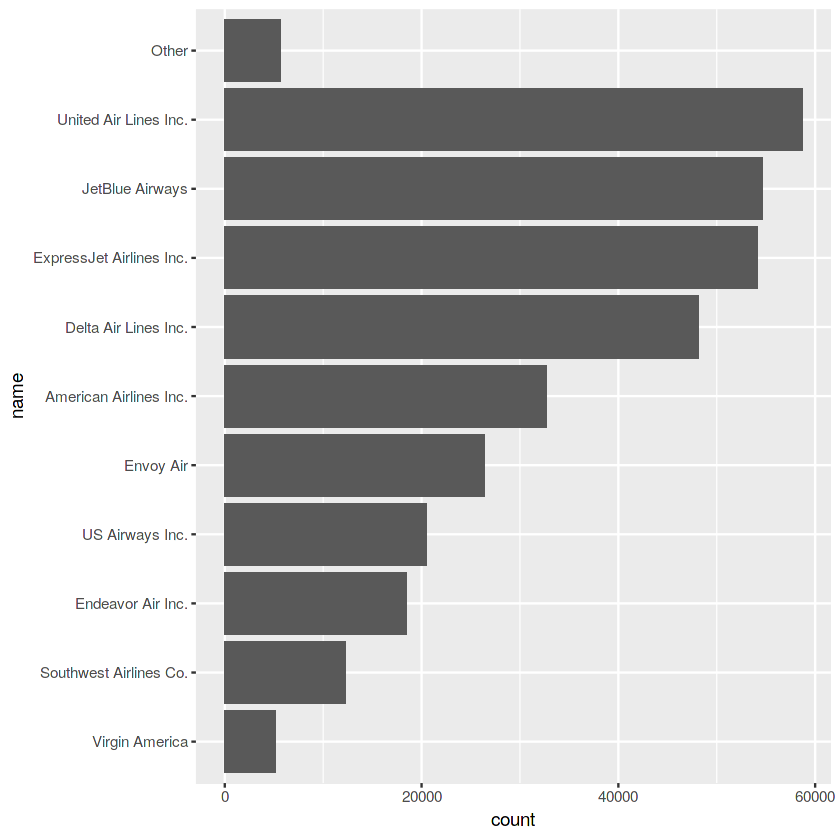

In [13]:
p=ggplot(name_count_flights, aes(x=name))
p=p+geom_bar()
p=p+coord_flip()
p